In [43]:
# Import the required libraries 

from bq_helper import BigQueryHelper
import bq_helper

from plotly.offline import init_notebook_mode, iplot
from wordcloud import WordCloud
import plotly.graph_objs as go
import matplotlib.pyplot as plt
#import chart_studio.plotly as py

from plotly import tools

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
init_notebook_mode(connected=True)

medicare = bq_helper.BigQueryHelper(active_project="bigquery-public-data", dataset_name="cms_medicare")
bq_assistant = BigQueryHelper("bigquery-public-data", "cms_medicare")


Using Kaggle's public dataset BigQuery integration.
Using Kaggle's public dataset BigQuery integration.


In [44]:
# How many nurrsing facilitins in different States 
query1 = """SELECT
state, COUNT(state) as total_facilities
FROM
  `bigquery-public-data.cms_medicare.nursing_facilities_2014`
  GROUP BY 
  state
ORDER BY
  total_facilities DESC;"""
response1 = medicare.query_to_pandas_safe(query1)
response1.head(10)


,state,total_facilities
0,TX,1200
1,CA,1084
2,OH,936
3,IL,709
4,PA,703
5,FL,688
6,NY,618
7,IN,511
8,MO,497
9,MI,424


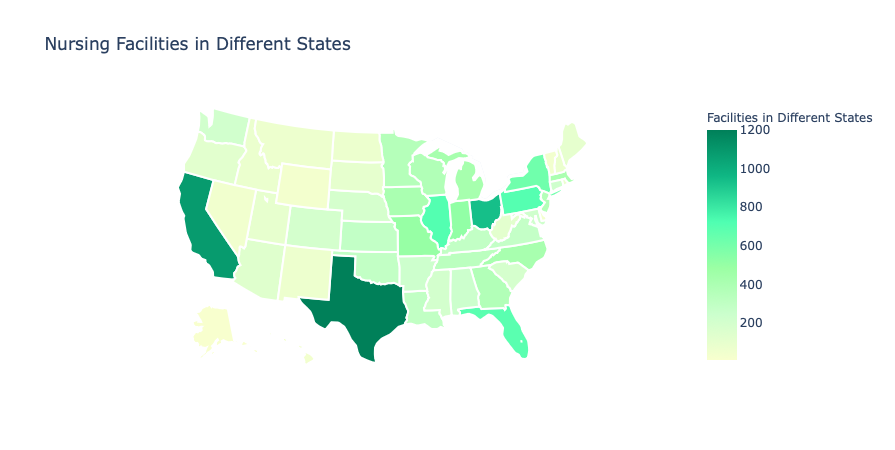

In [45]:
scl = [[0.0, 'rgb(248,255,206)'],[0.2, 'rgb(203,255,205)'],[0.4, 'rgb(155,255,164)'], [0.6, 'rgb(79,255,178)'],[0.8, 'rgb(15,183,132)'], [1, '#008059']]
query1 = """SELECT
state, COUNT(state) as total_facilities
FROM
  `bigquery-public-data.cms_medicare.nursing_facilities_2014`
  GROUP BY 
  state
ORDER BY
  total_facilities DESC;"""
response1 = medicare.query_to_pandas_safe(query1)
response1.head(10)
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = response1.state,
        z = response1.total_facilities,
        locationmode = 'USA-states',
        text = response1.state,
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Facilities in Different States")
        )
       ]

layout = dict(
        title = 'Nursing Facilities in Different States',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
iplot( fig, filename='d3-cloropleth-map' )

In [46]:
query2 = """SELECT
  state, AVG(average_hcc_score) as avg_hcc_score, Max(average_hcc_score) as max_hcc_score, Min(average_hcc_score) as min_hcc_score, COUNT(average_hcc_score) as total_facilities
FROM
  `bigquery-public-data.cms_medicare.nursing_facilities_2014`
  GROUP BY 
  state
ORDER BY
  avg_hcc_score DESC;
        """
response2 = medicare.query_to_pandas_safe(query2)
response2.head(10)

,state,avg_hcc_score,max_hcc_score,min_hcc_score,total_facilities
0,CA,2.612878,9.15,1.11,1084
1,LA,2.557959,4.91,1.39,294
2,NJ,2.555961,5.36,1.53,359
3,TX,2.545792,5.75,1.23,1200
4,FL,2.514390,5.70,1.11,688
5,NV,2.513182,4.73,1.49,44
6,MI,2.504481,7.12,1.20,424
7,OH,2.454872,7.07,0.85,936
8,GA,2.449700,4.31,1.30,367
9,AZ,2.415435,5.42,1.27,138


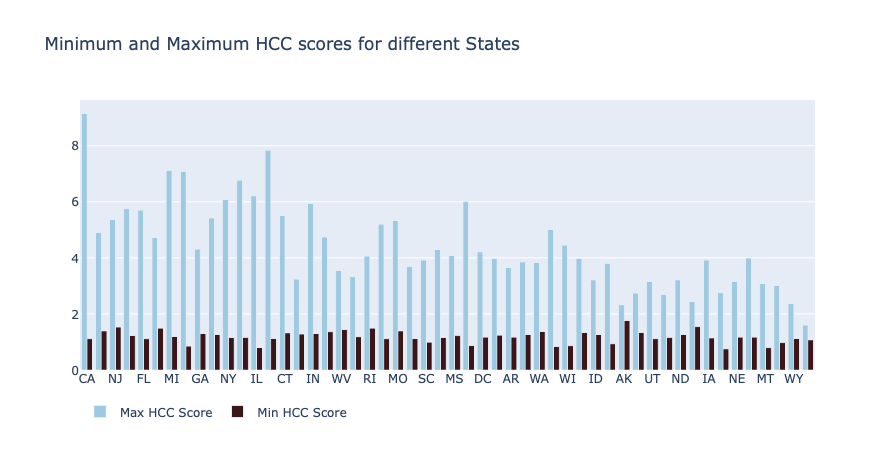

In [47]:
trace1 = go.Bar(
    x=response2.state,
    y=response2.max_hcc_score,
    name='Max HCC Score',
    marker=dict(color='rgb(158,202,225)'),
)
trace2 = go.Bar(
    x=response2.state,
    y=response2.min_hcc_score,
    name='Min HCC Score',
    marker=dict(color='rgb(58,22,25)'),
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    title='Minimum and Maximum HCC scores for different States',
    legend=dict(orientation="h")
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

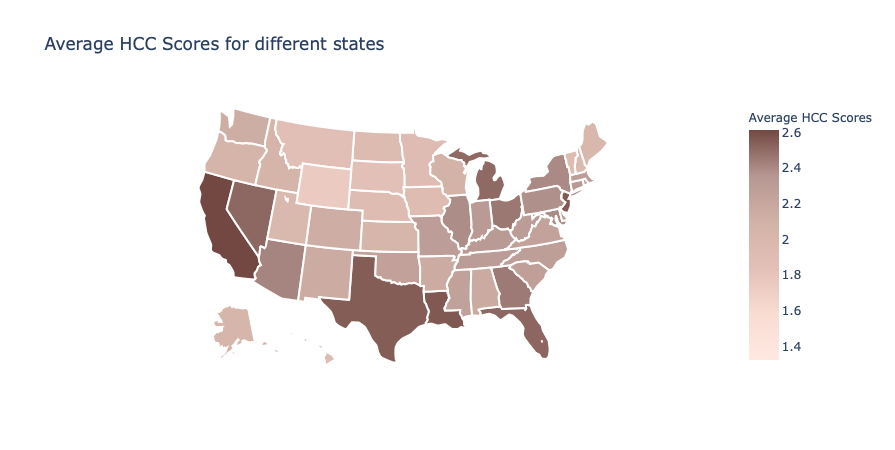

In [48]:
### Average HCC Scores for different states 

scl = [[0.0, 'rgb(255,233,225)'],[0.2, 'rgb(249,220,211)'],[0.4, 'rgb(227,192,183)'], [0.6, 'rgb(210,178,167)'],[0.8, 'rgb(182,151,146)'],[1.0, '#734842']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = response2.state,
        z = response2.avg_hcc_score,
        locationmode = 'USA-states',
        text = response2.state,
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Average HCC Scores")
        )
       ]

layout = dict(
        title = 'Average HCC Scores for different states',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
iplot( fig, filename='d3-cloropleth-map' )

In [49]:
query3 = """SELECT facility_name, city, state, average_hcc_score
FROM `bigquery-public-data.cms_medicare.nursing_facilities_2014`
ORDER BY average_hcc_score DESC;
        """
response3 = medicare.query_to_pandas_safe(query3)
response3.head(15)

#response3.tail(5)

,facility_name,city,state,average_hcc_score
0,DOCTORS HOSP OF WEST COVINA,WEST COVINA,CA,9.15
1,FOX SUBACUTE AT MECHANICSBURG,MECHANICSBURG,PA,7.84
2,OMNI CONTINUING CARE,DETROIT,MI,7.12
3,ORCHARDS OF RIDGEWOOD LIVING & REHAB CTR THE,AKRON,OH,7.07
4,MANORCARE HEALTH SYSTEM - ADELPHI,ADELPHI,MD,6.77
5,NORTH VALLEY NURSING CENTER,TUJUNGA,CA,6.76
6,PATAPSCO VALLEY CENTER,RANDALLSTOWN,MD,6.73
7,SPRINGBROOK CENTER,SILVER SPRING,MD,6.72
8,GLENSHIRE NURSING & REHAB CTRE,RICHTON PARK,IL,6.21
9,PARAMOUNT MEADOWS NURSING CTR.,PARAMOUNT,CA,6.15


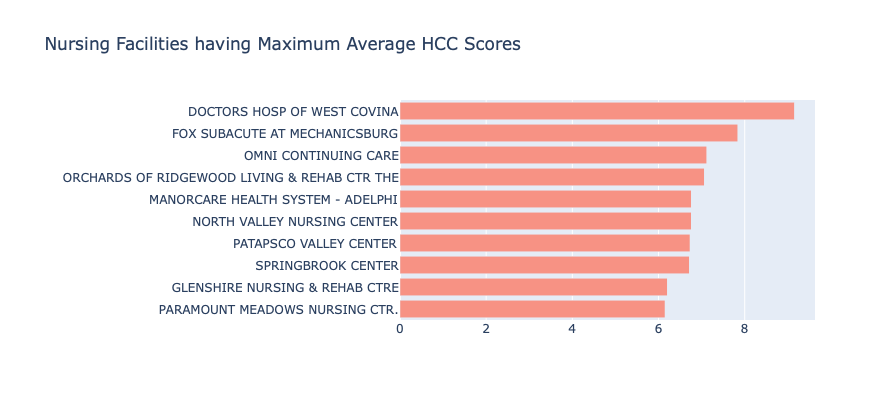

In [50]:
tempdf = response3.head(10)
y = list(reversed(list(tempdf.facility_name)))
x = list(reversed(list(tempdf.average_hcc_score)))
trace1 = go.Bar(x=x, y=y, orientation="h", marker=dict(color='#f79284'),)
layout = dict(height=400, width=700, margin=dict(l=400), title='Nursing Facilities having Maximum Average HCC Scores')
data = [trace1]

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='stacked-bar')

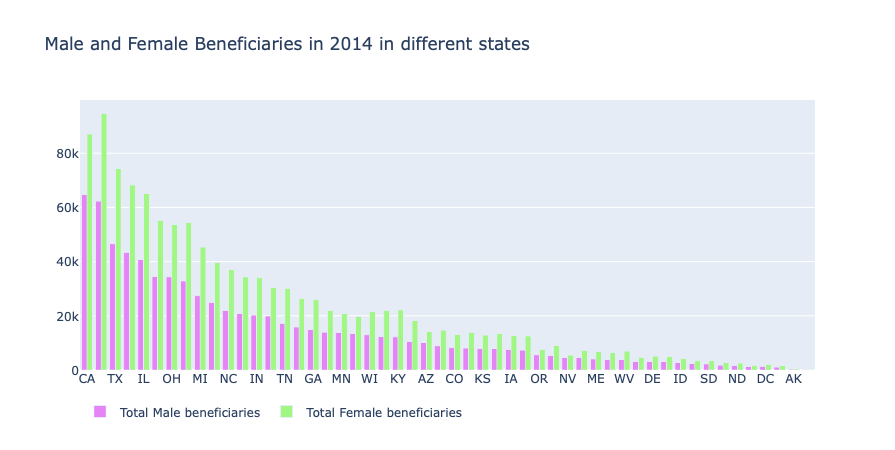

In [51]:
query1 = """SELECT
  state, Sum(male_beneficiaries) as male_ben, Sum(female_beneficiaries) as female_ben
FROM
  `bigquery-public-data.cms_medicare.nursing_facilities_2014`
  GROUP BY 
      state
  ORDER BY
      male_ben DESC;
        """
response1 = medicare.query_to_pandas_safe(query1)


trace1 = go.Bar(
    x=response1.state,
    y=response1.male_ben,
    marker=dict(color='#e584f7'),
    name='Total Male beneficiaries'
)
trace2 = go.Bar(
    x=response1.state,
    y=response1.female_ben,
    marker=dict(color='#a0f784'),
    name='Total Female beneficiaries'
)

data = [trace1, trace2]
layout = go.Layout(barmode='group', legend=dict(orientation='h'), title='Male and Female Beneficiaries in 2014 in different states')
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

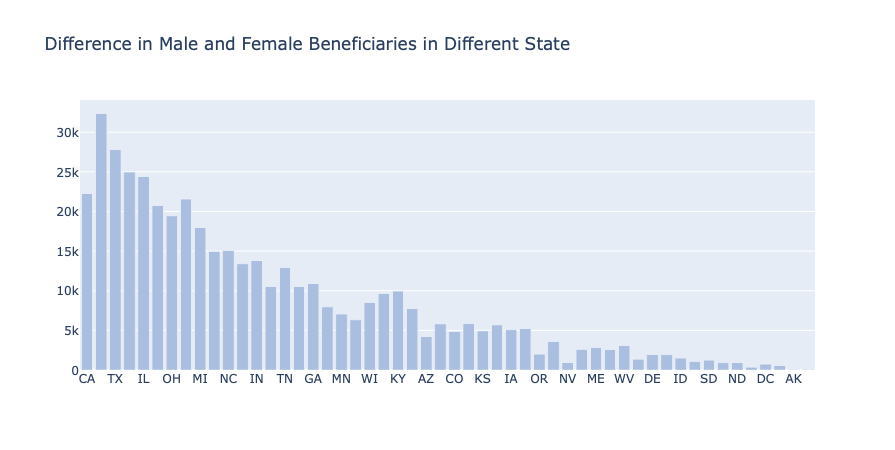

In [52]:
response1['difference'] = response1['female_ben'] - response1['male_ben']

trace1 = go.Bar(
    x=response1.state,
    y=response1.difference,
    marker=dict(color='#aabfe0'),
    name='Total Male beneficiaries'
)
data = [trace1]
layout = go.Layout(barmode='group', legend=dict(orientation='h'), title='Difference in Male and Female Beneficiaries in Different State')
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

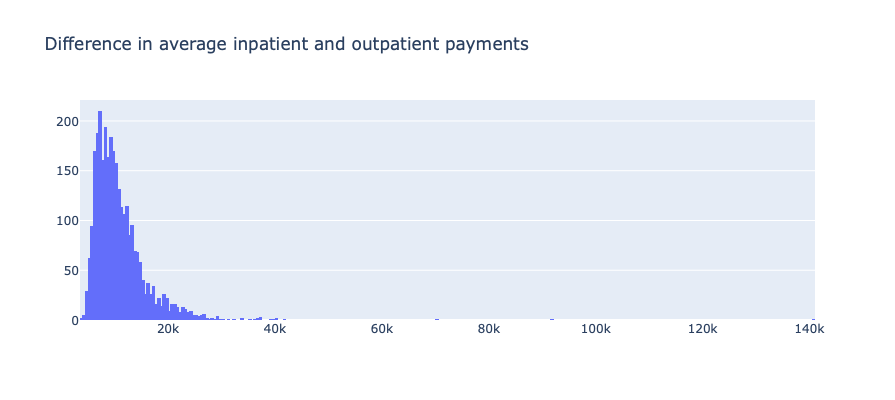

In [53]:
query3_a = """SELECT provider_id, avg(average_total_payments) as average_outpatient_payments
FROM `bigquery-public-data.cms_medicare.outpatient_charges_2014` group by provider_id;"""
outp = medicare.query_to_pandas_safe(query3_a)

query3_b = """SELECT provider_id, avg(average_total_payments) as average_inpatient_payments
FROM `bigquery-public-data.cms_medicare.inpatient_charges_2014` group by provider_id;"""
inp = medicare.query_to_pandas_safe(query3_b)

merged = outp.merge(inp, on="provider_id", how = 'inner')
merged["difference"] = merged["average_inpatient_payments"] - merged['average_outpatient_payments']

tracex = go.Histogram(x = merged["difference"]) 
fig = go.Figure(data = [tracex])
fig['layout'].update(height=400, showlegend=False, title="Difference in average inpatient and outpatient payments");
iplot(fig, filename='simple-subplot');

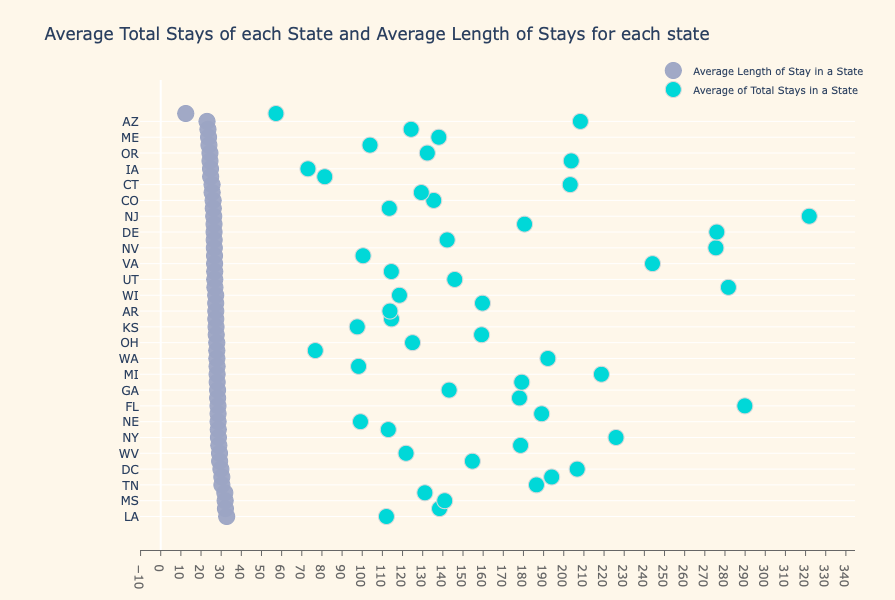

In [54]:
query2 = """SELECT
  state, AVG(average_length_of_stays_days) as average_length_of_stays_days, AVG(total_stays) as total_stays
FROM
  `bigquery-public-data.cms_medicare.nursing_facilities_2014`
  GROUP BY 
  state
ORDER BY
  average_length_of_stays_days DESC;
        """
response2 = medicare.query_to_pandas_safe(query2)
response2.head(10)


trace0 = go.Scatter(
    x=response2.average_length_of_stays_days,
    y=response2.state,
    mode='markers',
    name='Average Length of Stay in a State',
    marker=dict(
        color='rgba(156, 165, 196, 0.95)',
        line=dict(
            color='rgba(156, 165, 196, 1.0)',
            width=1,
        ),
        symbol='circle',
        size=16,
    )
)
trace1 = go.Scatter(
    x=response2.total_stays,
    y=response2.state,
    mode='markers',
    name='Average of Total Stays in a State ',
    marker=dict(
        color='#00d8d8',
        line=dict(
            color='rgba(217, 217, 217, 1.0)',
            width=1,
        ),
        symbol='circle',
        size=16,
    )
)

data = [trace0, trace1]
layout = go.Layout(
    title="Average Total Stays of each State and Average Length of Stays for each state ",
    xaxis=dict(
        showgrid=False,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        titlefont=dict(
            color='rgb(204, 204, 204)'
        ),
        tickfont=dict(
            color='rgb(102, 102, 102)',
        ),
#         autotick=False,
        dtick=10,
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    margin=dict(
        l=140,
        r=40,
        b=50,
        t=80
    ),
    legend=dict(
        font=dict(
            size=10,
        ),
        yanchor='middle',
        xanchor='right',
    ),
#     width=800,
    height=600,
    paper_bgcolor='rgb(254, 247, 234)',
    plot_bgcolor='rgb(254, 247, 234)',
    hovermode='closest',
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='lowest-oecd-votes-cast')

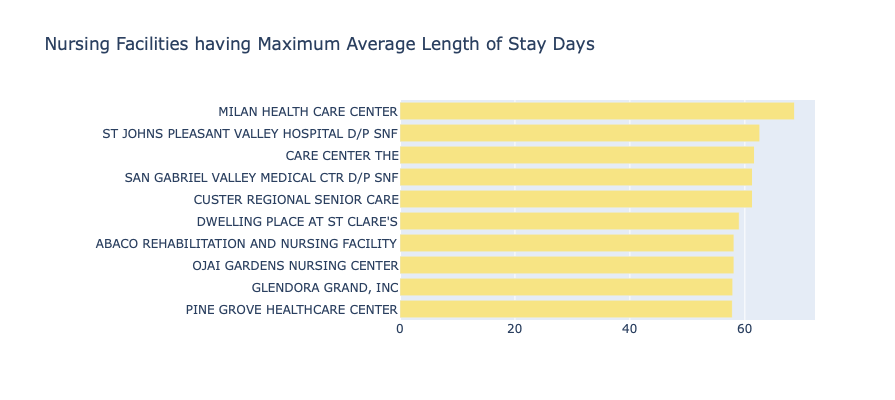

In [55]:
# which facilities have highest stays count 

query1 = """SELECT
  facility_name, city, state, average_length_of_stays_days
FROM
  `bigquery-public-data.cms_medicare.nursing_facilities_2014`
ORDER BY
  average_length_of_stays_days DESC;
        """
response1 = medicare.query_to_pandas_safe(query1)

tempdf = response1.head(10)
y = list(reversed(list(tempdf.facility_name)))
x = list(reversed(list(tempdf.average_length_of_stays_days)))
trace1 = go.Bar(x=x, y=y, orientation="h", marker=dict(color='#f7e484'))
layout = dict(height=400, width=700, title='Nursing Facilities having Maximum Average Length of Stay Days', margin=dict(l=400))
data = [trace1]

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='stacked-bar')

In [56]:
query1 = """SELECT
  nppes_provider_state AS state,
  ROUND(SUM(total_claim_count) / 1e6) AS total_claim_count_millions,
  ROUND(SUM(total_day_supply) / 1e6) AS total_day_supply_millions,
  ROUND(SUM(total_drug_cost) / 1e6) AS total_drug_cost_millions
FROM
  `bigquery-public-data.cms_medicare.part_d_prescriber_2014`
GROUP BY
  state
ORDER BY
  total_claim_count_millions DESC;
        """
response1 = medicare.query_to_pandas_safe(query1)
response1.head(10)

,state,total_claim_count_millions,total_day_supply_millions,total_drug_cost_millions
0,CA,116.0,4935.0,9633.0
1,FL,91.0,3769.0,6970.0
2,NY,80.0,3150.0,7522.0
3,TX,76.0,3105.0,6462.0
4,PA,63.0,2402.0,4842.0
5,OH,53.0,2181.0,4051.0
6,NC,46.0,1706.0,3358.0
7,IL,43.0,1724.0,3121.0
8,MI,39.0,1797.0,3193.0
9,GA,39.0,1403.0,2787.0


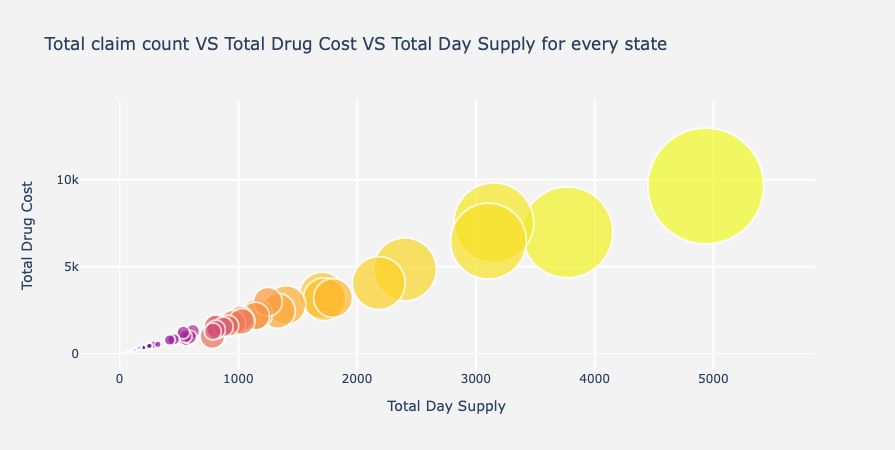

In [57]:
trace1 = go.Scatter(
    x=response1.total_day_supply_millions,
    y=response1.total_drug_cost_millions,
    mode='markers',
    text=response1.state,
    marker=dict(
        color=list(reversed([i*11 for i in range(200,251)])),
        size=response1.total_claim_count_millions,
        line=dict(
            width=2
        ),
    )
)
data = [trace1]

layout = go.Layout(
    title='Total claim count VS Total Drug Cost VS Total Day Supply for every state',
    xaxis=dict(
        title='Total Day Supply',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    yaxis=dict(
        title='Total Drug Cost',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='scatter-colorscale')

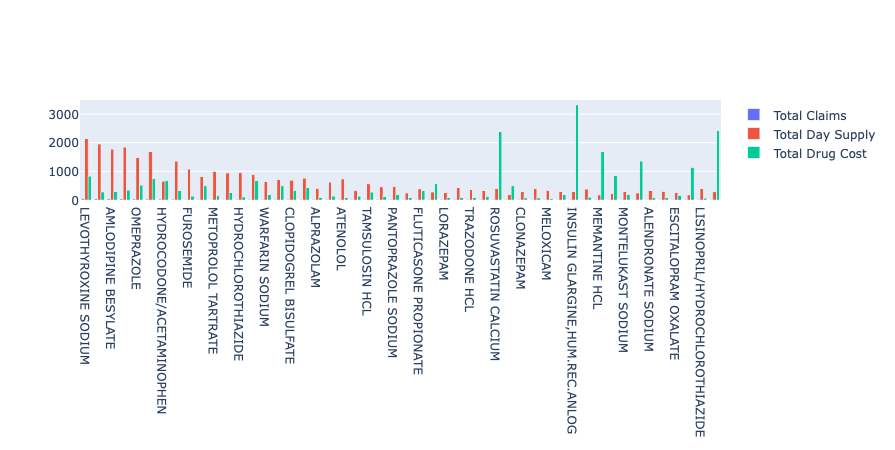

In [58]:
# state wise count of claims 

## Which providers have highest claims 

query1 = """SELECT
  generic_name AS drug_name,
  ROUND(SUM(total_claim_count) / 1e6) AS total_claim_count_millions,
  ROUND(SUM(total_day_supply) / 1e6) AS total_day_supply_millions,
  ROUND(SUM(total_drug_cost) / 1e6) AS total_drug_cost_millions
FROM
  `bigquery-public-data.cms_medicare.part_d_prescriber_2014`
GROUP BY
  drug_name
ORDER BY
  total_claim_count_millions DESC;
        """
response1 = medicare.query_to_pandas_safe(query1)
tempdf = response1.head(50)

trace1 = go.Bar(
    x=tempdf.drug_name,
    y=tempdf.total_claim_count_millions,
    name='Total Claims'
)
trace2 = go.Bar(
    x=tempdf.drug_name,
    y=tempdf.total_day_supply_millions,
    name='Total Day Supply'
)
trace3 = go.Bar(
    x=tempdf.drug_name,
    y=tempdf.total_drug_cost_millions,
    name='Total Drug Cost'
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    barmode='group'
    , margin=dict(b=200)
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

In [59]:
query1 = """SELECT
  specialty_description AS specialty_description,
  ROUND(SUM(total_claim_count) / 1e6) AS total_claim_count_millions,
  ROUND(SUM(total_day_supply) / 1e6) AS total_day_supply_millions,
  ROUND(SUM(total_drug_cost) / 1e6) AS total_drug_cost_millions
FROM
  `bigquery-public-data.cms_medicare.part_d_prescriber_2014`
GROUP BY
  specialty_description
ORDER BY
  total_claim_count_millions DESC;
        """
response1 = medicare.query_to_pandas_safe(query1)
tempdf = response1.head(40)
tempdf['specialty_description1'] = tempdf['specialty_description'].apply(lambda x: x.replace(" ","_"))

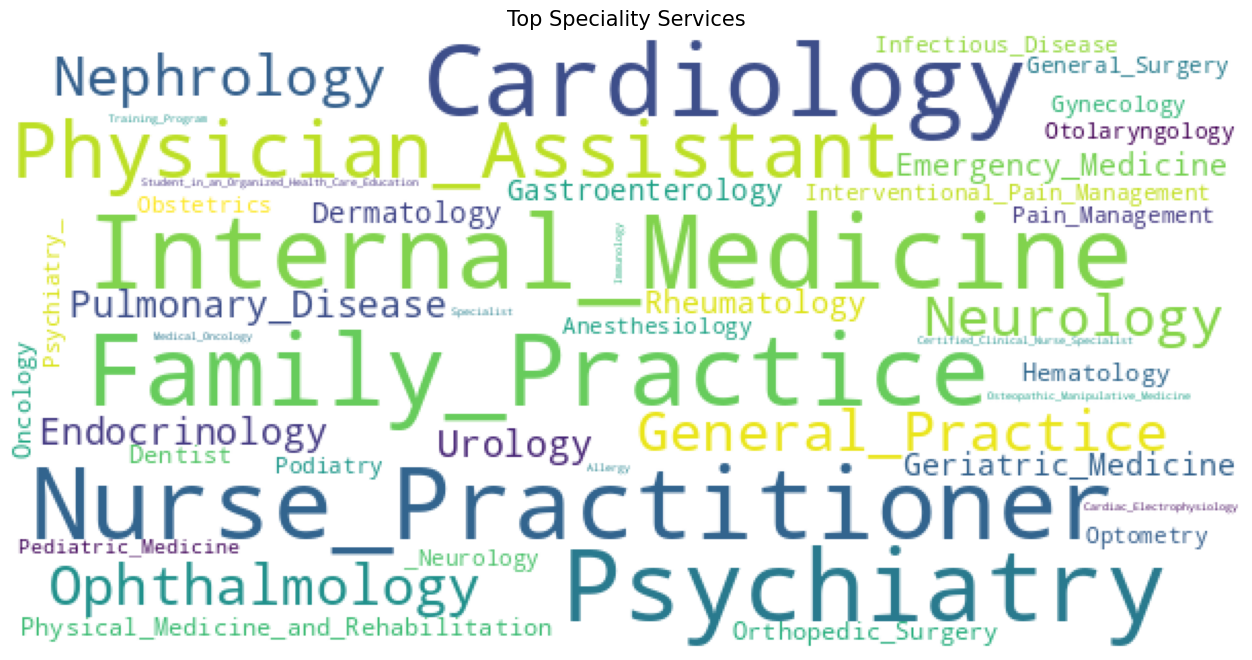

In [60]:
txt = " ".join(tempdf.specialty_description1)
wordcloud = WordCloud(background_color='white', max_font_size=50, width=600, height=300).generate(txt)
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.title("Top Speciality Services", fontsize=15)
plt.axis("off")
plt.show() 

In [61]:
query1 = """select A.state, B.drug_name, A.MaxClaimCount from (select state, MAX(total_claim_count_millions) as MaxClaimCount from (
SELECT
  nppes_provider_state AS state, generic_name AS drug_name, SUM(total_claim_count) AS total_claim_count_millions
FROM
  `bigquery-public-data.cms_medicare.part_d_prescriber_2014`
GROUP BY state, drug_name
ORDER BY
  total_claim_count_millions DESC) group by state) A INNER JOIN (SELECT
  nppes_provider_state AS state,
  generic_name AS drug_name,
  SUM(total_claim_count) AS total_claim_count_millions
FROM
  `bigquery-public-data.cms_medicare.part_d_prescriber_2014`
GROUP BY
  state, drug_name
ORDER BY
  total_claim_count_millions DESC) B ON A.MaxClaimCount = B.total_claim_count_millions;
"""
response1 = medicare.query_to_pandas_safe(query1)

visited = {}
rows = []
for index, row in response1.iterrows():
    stat = row['state']
    if stat not in visited:
        visited[stat] = 1
        rows.append(row)
newDF = pd.DataFrame(rows).reset_index()
newDF[['state', 'drug_name', 'MaxClaimCount']].head(51)

,state,drug_name,MaxClaimCount
0,CA,LEVOTHYROXINE SODIUM,3844722
1,TN,HYDROCODONE/ACETAMINOPHEN,1377467
2,NC,LEVOTHYROXINE SODIUM,1513777
3,MD,LISINOPRIL,463341
4,ME,LISINOPRIL,208297
5,HI,ATORVASTATIN CALCIUM,158062
6,MA,LISINOPRIL,1126759
7,IL,LEVOTHYROXINE SODIUM,1457499
8,GA,AMLODIPINE BESYLATE,1282226
9,NV,HYDROCODONE/ACETAMINOPHEN,294635


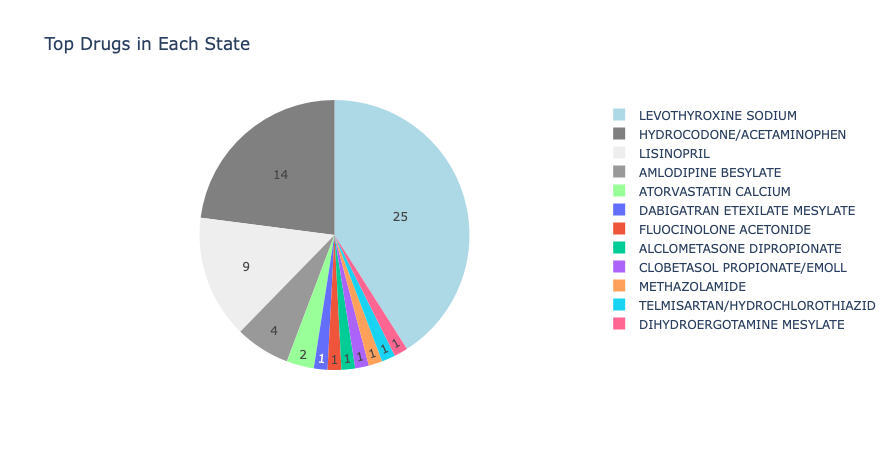

In [62]:
a = newDF['drug_name'].value_counts()
labels = a.index
values = a.values
colors = ['lightblue','gray','#eee','#999', '#9f9f']
trace = go.Pie(labels=labels, values=values, hoverinfo='label+percent', 
               textinfo='value', name='Top Drugs Used',
               marker=dict(colors=colors))
layout = dict(title = 'Top Drugs in Each State',
              xaxis= dict(title= 'Drug Name', ticklen= 5,zeroline= False),
              width=800
             )
fig = dict(data = [trace], layout = layout)
iplot(fig)

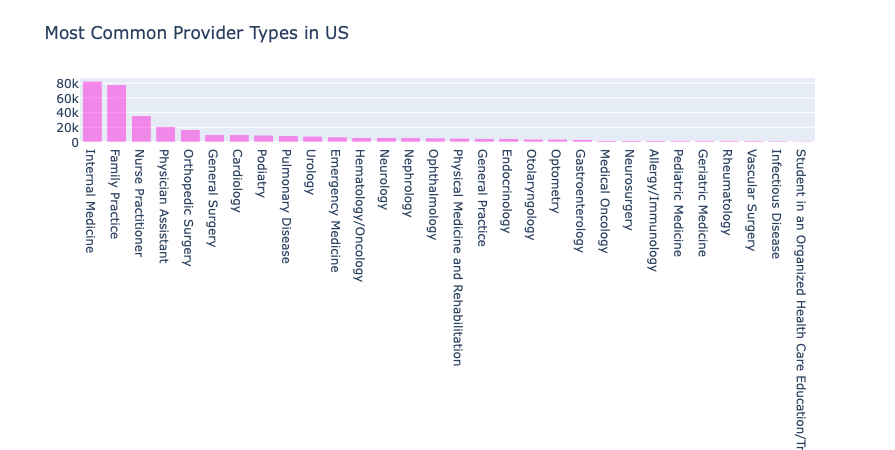

In [63]:
query1 = """SELECT provider_type, COUNT(provider_type) as count FROM
  `bigquery-public-data.cms_medicare.referring_durable_medical_equip_2014`
  GROUP BY provider_type ORDER BY count DESC;"""
response1 = medicare.query_to_pandas_safe(query1)

trace1 = go.Bar(x=list(response1.head(30)['provider_type']),
    y=list(response1.head(30)['count']),
    name='Popular Provider Types ',
    marker=dict(color='#ff23de'), opacity=0.5,
)

data = [trace1]
layout = go.Layout(
    barmode='group',
    title='Most Common Provider Types in US',
    legend=dict(orientation="h")
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [64]:
query1 = """SELECT provider_id, facility_name, city, state, total_stays, distinct_beneficiaries_per_provider,
       average_length_of_stays_days, total_snf_charge_amount,
       total_snf_medicare_allowed_amount,
       total_snf_medicare_payment_amount,
       total_snf_medicare_standard_payment_amount, average_age,
       male_beneficiaries, female_beneficiaries, nondual_beneficiaries,
       dual_beneficiaries, white_beneficiaries, black_beneficiaries, average_hcc_score,
       percent_of_beneficiaries_with_atrial_fibrillation,
       percent_of_beneficiaries_with_asthma,
       percent_of_beneficiaries_with_cancer,
       percent_of_beneficiaries_with_chf,
       percent_of_beneficiaries_with_chronic_kidney_disease,
       percent_of_beneficiaries_with_copd,
       percent_of_beneficiaries_with_depression,
       percent_of_beneficiaries_with_diabetes,
       percent_of_beneficiaries_with_hyperlipidemia,
       percent_of_beneficiaries_with_ihd,
       percent_of_beneficiaries_with_osteoporosis,
       percent_of_beneficiaries_with_ra_oa,
       percent_of_beneficiaries_with_schizophrenia,
       percent_of_beneficiaries_with_stroke FROM
  `bigquery-public-data.cms_medicare.nursing_facilities_2014`;"""
response1 = medicare.query_to_pandas_safe(query1)

# preprocessing the data before applying clustering 
X = response1
X.index = X.provider_id
X = X.drop(['provider_id', 'facility_name', 'city', 'state'], axis=1)
X = X.dropna()

# apply k-means clustering
from sklearn.cluster import KMeans 
import numpy as np 
kmeans = KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0) 
X['cluster'] = kmeans.fit_predict(X)

In [65]:
print ("Group A Cluster Elements: ")
cluster_elements = list(X[X['cluster'] == 0].index[:5])
temp = response1.loc[response1['provider_id'].isin(cluster_elements)]
j = 1
for i, row in temp[['facility_name', 'city', 'state']].iterrows():
    print (j, "\t "+", ".join(list(row)).title())
    j+= 1
print ()

print ("Group B Cluster Elements: ")
cluster_elements = list(X[X['cluster'] == 1].index[:5])
temp = response1.loc[response1['provider_id'].isin(cluster_elements)]
j = 1
for i, row in temp[['facility_name', 'city', 'state']].iterrows():
    print (j, "\t "+", ".join(list(row)).title())
    j+= 1
print ()    

print ("Group C Cluster Elements: ")
cluster_elements = list(X[X['cluster'] == 2].index[:5])
temp = response1.loc[response1['provider_id'].isin(cluster_elements)]
j = 1
for i, row in temp[['facility_name', 'city', 'state']].iterrows():
    print (j, "\t "+", ".join(list(row)).title())
    j+= 1
print ()

print ("Group D Cluster Elements: ")
cluster_elements = list(X[X['cluster'] == 3].index[:5])
temp = response1.loc[response1['provider_id'].isin(cluster_elements)]
j = 1
for i, row in temp[['facility_name', 'city', 'state']].iterrows():
    print (j, "\t "+", ".join(list(row)).title())
    j+= 1

Group A Cluster Elements: 
1 	 Washington Center For Comprehe, Seattle, Wa
2 	 Hilo Medical Center, Hilo, Hi
3 	 Linda Valley Care Center, Loma Linda, Ca
4 	 La Mariposa Care And Rehab Center, Fairfield, Ca
5 	 Eskaton Care Center Greenhaven, Sacramento, Ca

Group B Cluster Elements: 
1 	 Manorcare Health Services-Fair Oaks, Fairfax, Va
2 	 Kindred Transitional Care And Rehab-Tunnell Center, San Francisco, Ca
3 	 Washington Center, San Leandro, Ca
4 	 Silvercrest Center For Nursing And Rehabilitation, Jamaica, Ny
5 	 Diamond Ridge Healthcare Center, Pittsburg, Ca

Group C Cluster Elements: 
1 	 Heartland Health Care Center-Canton, Canton, Mi
2 	 Notting Hill Of West Bloomfield, W Bloomfield, Mi
3 	 Life Care Cent-Paradise Valley, Las Vegas, Nv
4 	 Care One At Teaneck, Teaneck, Nj
5 	 Eldorado Care Center, Llc, El Cajon, Ca

Group D Cluster Elements: 
1 	 Cherrydale Health And Rehabilitation Center, Arlington, Va
2 	 Coolidge House, Brookline, Ma
3 	 Gem Transitional, Pasadena, Ca
4 	 C

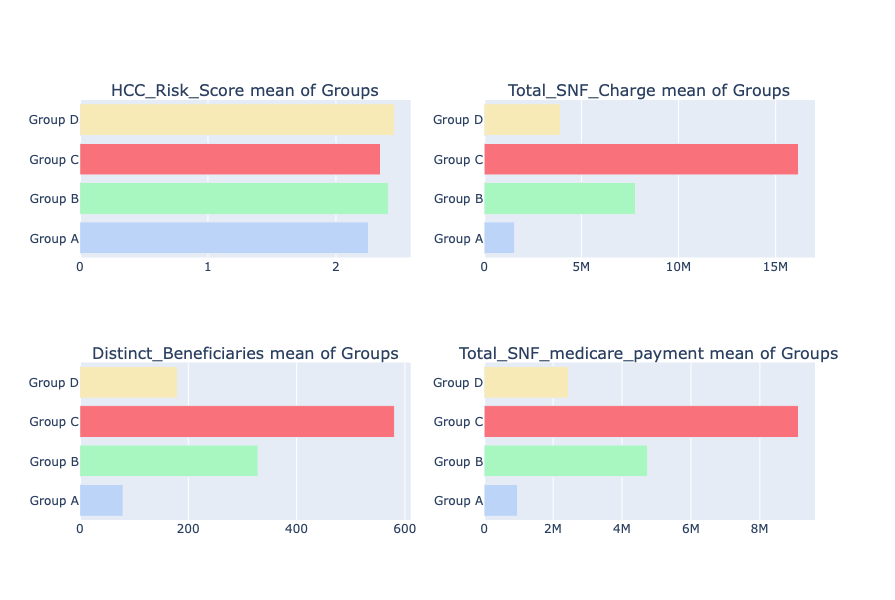

In [66]:
def plot_cluster_variables(col):
    mean_score1 =  (np.mean(X[X['cluster'] == 0][col]))
    mean_score2 = (np.mean(X[X['cluster'] == 1][col]))
    mean_score3 = (np.mean(X[X['cluster'] == 2][col]))
    mean_score4 = (np.mean(X[X['cluster'] == 3][col]))

    trace1 = go.Bar(
        y = ['Group A', 'Group B', 'Group C', 'Group D'],
        x = [mean_score1, mean_score2, mean_score3, mean_score4],
        orientation = 'h',
        marker=dict(color=['#bdd4f9', '#a8f7c1', '#f9727b', '#f7eab7'])
    )
    return trace1

f1 = plot_cluster_variables('average_hcc_score')
f2 = plot_cluster_variables('total_snf_charge_amount')
f3 = plot_cluster_variables('distinct_beneficiaries_per_provider')
f4 = plot_cluster_variables('total_snf_medicare_payment_amount')

fig = tools.make_subplots(rows=2, cols=2, print_grid=False, subplot_titles=('HCC_Risk_Score mean of Groups','Total_SNF_Charge mean of Groups', 'Distinct_Beneficiaries mean of Groups', 'Total_SNF_medicare_payment mean of Groups'))
fig.append_trace(f1, 1, 1);
fig.append_trace(f2, 1, 2);
fig.append_trace(f3, 2, 1);
fig.append_trace(f4, 2, 2);

fig['layout'].update(height=600, width=800, showlegend=False);
iplot(fig, filename='simple-subplot');

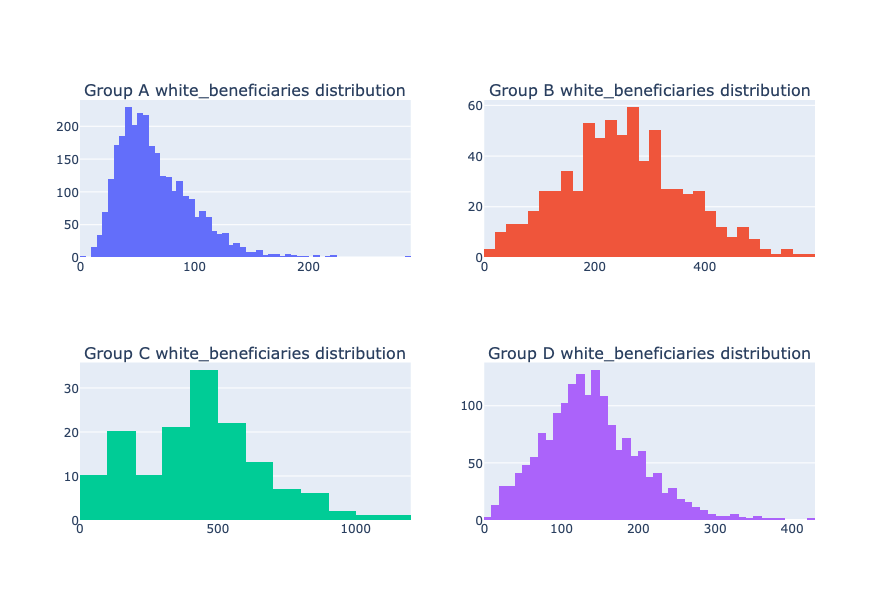

In [67]:
def generate_hist_plots(col):
    c1 = X[X['cluster'] == 0]
    trace1 = go.Histogram(x = c1[col]) 

    c2 = X[X['cluster'] == 1]
    trace2 = go.Histogram(x = c2[col]) 

    c3 = X[X['cluster'] == 2]
    trace3 = go.Histogram(x = c3[col]) 

    c4 = X[X['cluster'] == 3]
    trace4 = go.Histogram(x = c4[col]) 

    fig = tools.make_subplots(rows=2, cols=2, print_grid=False, subplot_titles=('Group A ' + col + ' distribution','Group B ' + col+ ' distribution','Group C ' + col+ ' distribution','Group D ' + col+ ' distribution'))
    fig.append_trace(trace1, 1, 1);
    fig.append_trace(trace2, 1, 2);
    fig.append_trace(trace3, 2, 1);
    fig.append_trace(trace4, 2, 2);
    fig['layout'].update(height=600, showlegend=False);
    iplot(fig, filename='simple-subplot');

col = 'white_beneficiaries'
generate_hist_plots(col)

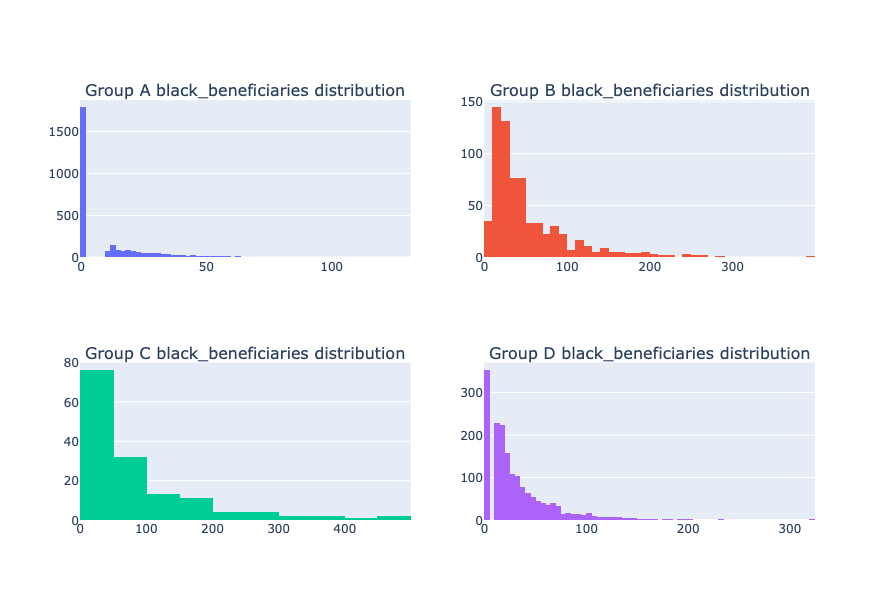

In [68]:
col = 'black_beneficiaries'
generate_hist_plots(col)

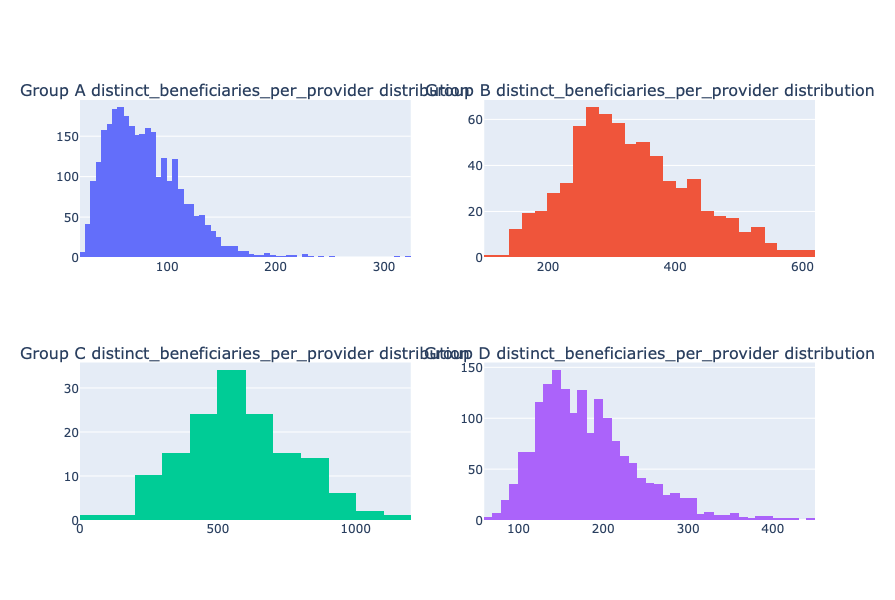

In [69]:
col = 'distinct_beneficiaries_per_provider'
generate_hist_plots(col)

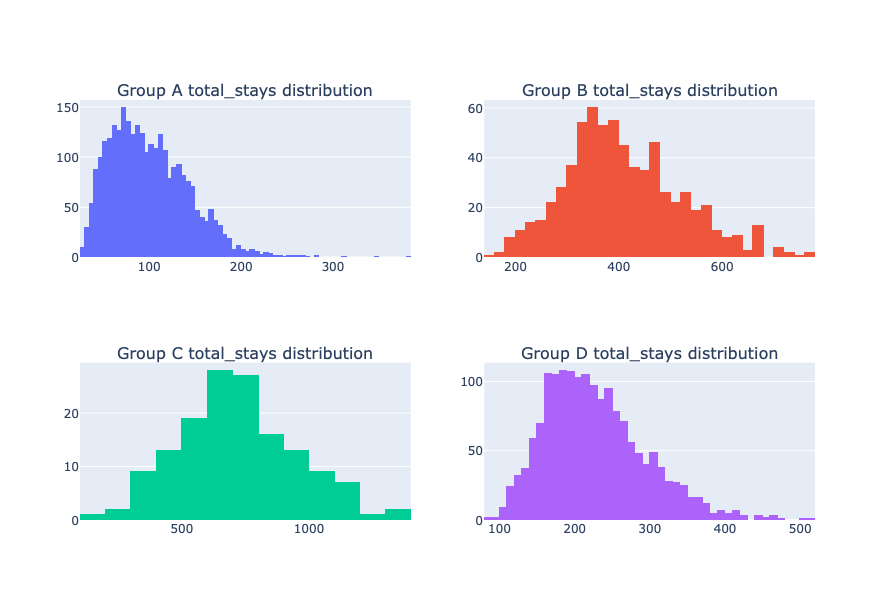

In [70]:
col = 'total_stays'
generate_hist_plots(col)